In [320]:
import numpy as np
import pandas as pd
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [321]:
#shows the data set
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [322]:
#checking whether there is null values in the data set 
df.isnull().values.any()

False

In [323]:
#the shape of the dataframe 
df.shape

(284807, 31)

In [324]:
#We are checing the number of customers who experienced credit card frauduelent transactions
#Here 0 means normal transactions and 1 means fraduelent transactions  
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

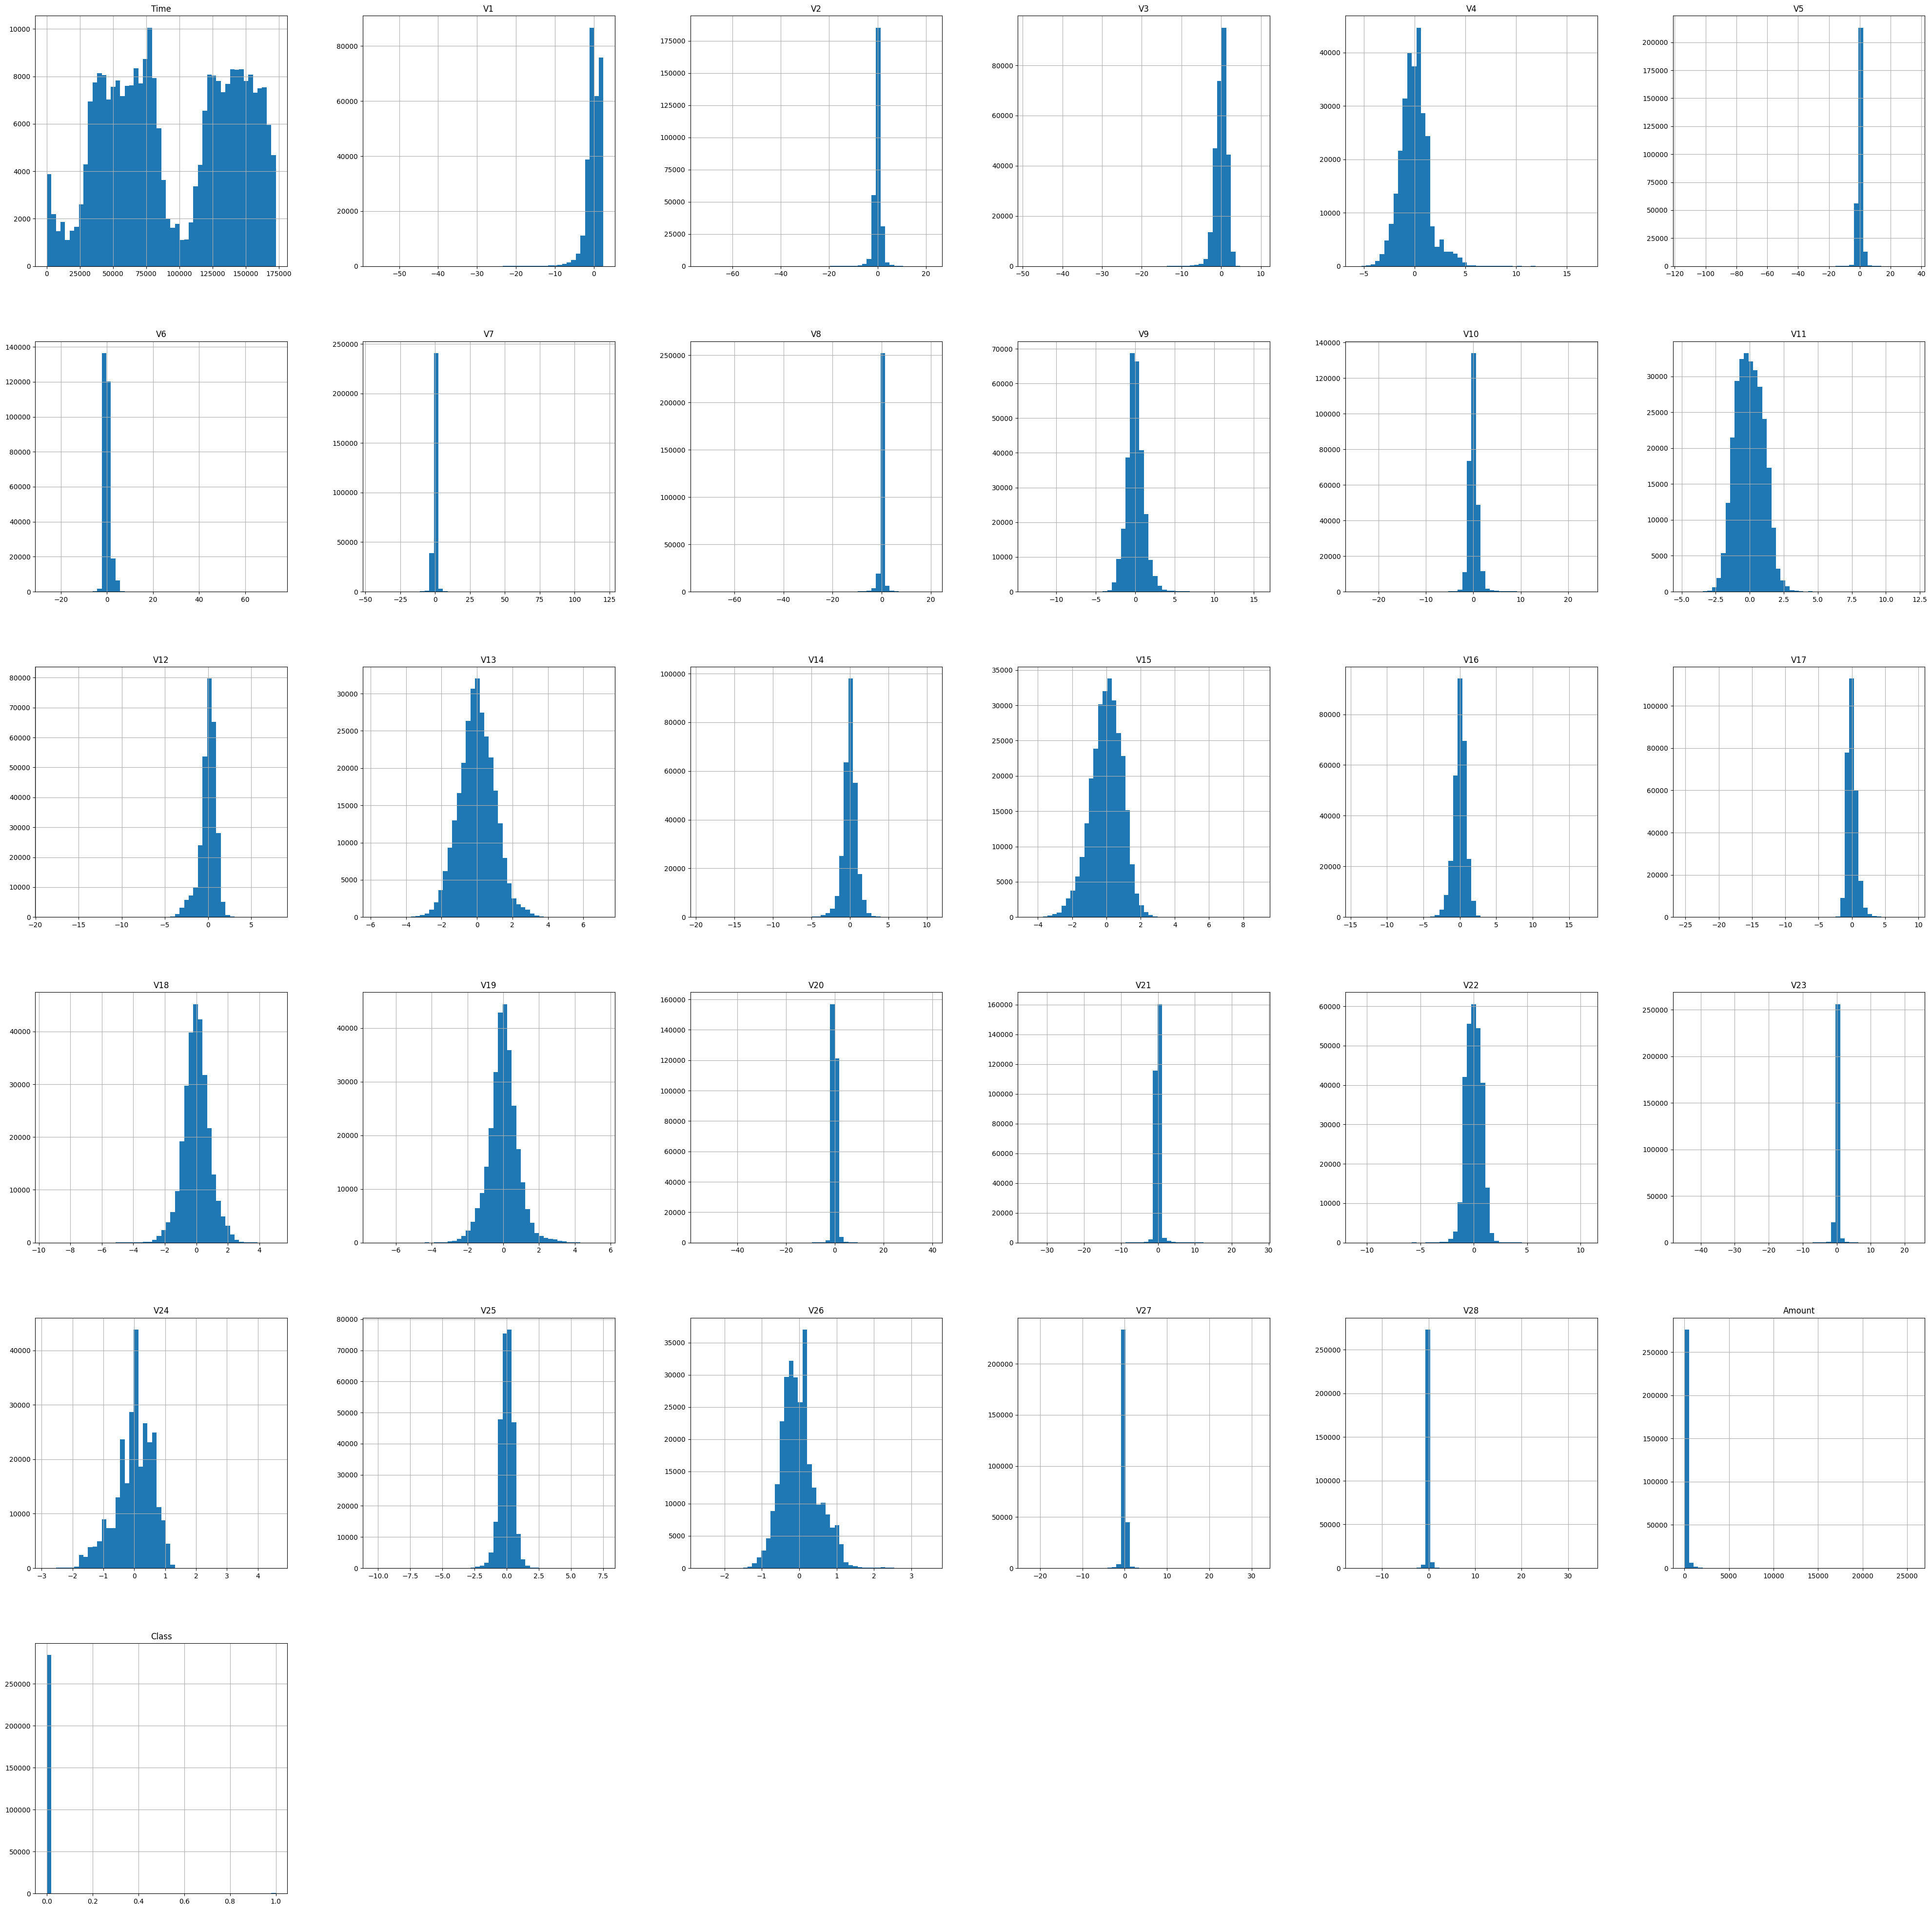

In [325]:
df.hist(bins=50, figsize=(50, 50))

In [326]:
#The only thing which is valuable for us to understand from this describtion of dataset is that the minimum is 0 and maximum is 1 which can be observed in the Class column
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [327]:
#Data Cleaning (the Time column)
from sklearn.preprocessing import RobustScaler
new_df=df.copy()
new_df['Amount']=RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1,1))
time = new_df['Time']
new_df['Time']=(time - time.min())/(time.max()-time.min())
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


In [328]:
new_df = new_df.sample(frac=1,random_state=1)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,0.693938,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,-0.282401,0
127467,0.453377,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,-0.279746,0
137900,0.476770,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,-0.294977,0
21513,0.183556,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,-0.084119,0
134700,0.468326,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,-0.296793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,0.183261,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,32.002515,0
117583,0.432480,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,2.086495,0
73349,0.318852,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,-0.201495,0
267336,0.941757,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,1.017257,0


In [329]:
df_np=new_df.to_numpy()

In [330]:
#Loading the data into X except for the Class
drop_cols=[-1]
X =np.delete(df_np,drop_cols,axis=1)
X

array([[ 0.69393838, -0.611712  , -0.76970532, ...,  0.06650137,
         0.22117956, -0.28240061],
       [ 0.45337747, -0.81468171,  1.31921886, ...,  0.16242733,
         0.05945625, -0.27974569],
       [ 0.47676976, -0.31819348,  1.1186177 , ...,  0.2490497 ,
         0.09251561, -0.29497659],
       ...,
       [ 0.31885157, -1.14996324,  1.69646167, ..., -0.16204654,
         0.03119279, -0.20149514],
       [ 0.94175656,  1.75455368, -0.69939829, ..., -0.00585291,
        -0.01962208,  1.01725704],
       [ 0.45474328, -0.70763501,  0.49330227, ..., -0.38558861,
        -0.20558893,  0.50024453]])

In [331]:
#Loading the data into y that is only the Class
y=df_np[:,-1]
y

array([0., 0., 0., ..., 0., 0., 0.])

# ***Logistic Regression with Unbalanced Data Set***

In [332]:
#Test_Train split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [333]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
logistic_model.score(x_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9991792666066843

In [334]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logistic_model.predict(x_test),target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     56875
       Fraud       0.85      0.59      0.69        87

    accuracy                           1.00     56962
   macro avg       0.92      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



# ***Logistic Regression with Balanced Data Set***

In [335]:
#Checking the number of Frauds & Not Frauds Data
not_frauds = new_df.query('Class == 0')
frauds = new_df.query('Class == 1')
not_frauds['Class'].value_counts(), frauds['Class'].value_counts()

(Class
 0    284315
 Name: count, dtype: int64,
 Class
 1    492
 Name: count, dtype: int64)

In [336]:
#Balancing the data set
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['Class'].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [337]:
balanced_df = balanced_df.sample(frac=1,random_state=3)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
247995,0.889862,1.146259,1.403458,-4.159148,2.660107,-0.323217,-1.836071,-1.623740,0.259562,-1.132044,...,0.564450,0.445744,-0.141136,-0.265517,0.362260,-0.416062,0.507370,0.243744,0.410396,1
155825,0.616307,1.990782,-0.131333,-0.139775,0.537478,-0.588547,-0.706836,-0.532783,-0.173258,2.574530,...,-0.260028,-0.345248,0.368608,-0.127376,-0.398182,-0.960453,0.037125,-0.033214,-0.277789,0
68320,0.306345,1.036639,0.407227,0.757706,3.161821,-0.568122,0.202181,-0.689804,0.411380,0.336769,...,-0.050108,0.123761,-0.132568,0.350231,0.507701,0.189621,0.061016,0.063141,-0.296793,1
229827,0.845352,1.949069,0.097117,-1.700814,1.402611,0.446033,-1.123841,0.746729,-0.468529,0.156466,...,0.069316,0.323966,-0.076042,-0.092976,0.485358,-0.492049,-0.025518,-0.053303,0.529588,0
8615,0.067301,-3.891192,7.098916,-11.426467,8.607557,-2.065706,-2.985288,-8.138589,2.973928,-6.272790,...,1.757085,-0.189709,-0.508629,-1.189308,1.188536,0.605242,1.881529,0.875260,-0.293440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276670,0.967846,2.123476,0.076734,-2.469936,-0.307455,1.102028,-0.706358,0.705575,-0.381531,-0.129247,...,0.166730,0.566593,-0.115255,0.168280,0.531314,0.222732,-0.093293,-0.084963,-0.099211,0
12960,0.131841,-0.791251,0.381387,2.474644,-1.706811,-0.505514,-0.253110,0.053438,0.198984,2.643012,...,-0.096469,0.057495,-0.282796,-0.015357,0.366123,-0.779070,0.086561,0.064145,-0.139034,0
245347,0.883779,0.051075,1.310427,0.733222,2.620282,1.402358,0.528489,1.086014,-0.146423,-1.724333,...,0.229936,0.766927,-0.189624,0.766853,-0.141401,-0.077278,-0.297595,-0.221816,-0.272899,1
87621,0.357453,0.747077,-0.394535,0.198084,1.210625,0.400541,1.744041,-0.142398,0.567732,0.023678,...,0.112833,0.364258,-0.081104,-1.007971,0.342656,-0.242952,0.067618,0.014912,1.481171,0


In [338]:
#Test_Train split
balanced_df_np = balanced_df.to_numpy()
drop_cols=[-1]
X_b= np.delete(balanced_df_np,drop_cols,axis=1) 
y_b=balanced_df_np[:,-1]
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(X_b,y_b,test_size=0.2)
x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape

((787, 30), (787,), (197, 30), (197,))

In [339]:
pd.Series(y_train_b).value_counts(), pd.Series(y_test_b).value_counts()

(0.0    398
 1.0    389
 Name: count, dtype: int64,
 1.0    103
 0.0     94
 Name: count, dtype: int64)

In [340]:
logistic_model_b = LogisticRegression()
logistic_model_b.fit(x_train_b, y_train_b)
print(classification_report(y_test_b, logistic_model_b.predict(x_test_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.89      0.91      0.90        94
       Fraud       0.92      0.89      0.91       103

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197

